# What was the change in price of the stock overtime?

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/SUZLON.NS.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-12,6.95,6.95,6.95,6.95,6.95,4611813
1,2021-01-13,6.65,6.65,6.65,6.65,6.65,5276324
2,2021-01-14,6.35,6.35,6.35,6.35,6.35,4886505
3,2021-01-15,6.20,6.65,6.15,6.65,6.65,22566273
4,2021-01-18,6.85,6.95,6.70,6.95,6.95,37886970


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,6.690763,6.823896,6.508434,6.657229,6.657229,4.623217e+07
std,1.281488,1.279854,1.235794,1.265544,1.265544,5.145913e+07
min,4.500000,4.600000,4.400000,4.450000,4.450000,3.931543e+06
25%,5.750000,5.900000,5.600000,5.750000,5.750000,1.784593e+07
50%,6.650000,6.750000,6.450000,6.600000,6.600000,2.863520e+07
75%,7.200000,7.400000,7.000000,7.100000,7.100000,4.996010e+07
max,12.000000,12.250000,11.350000,11.700000,11.700000,3.156889e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


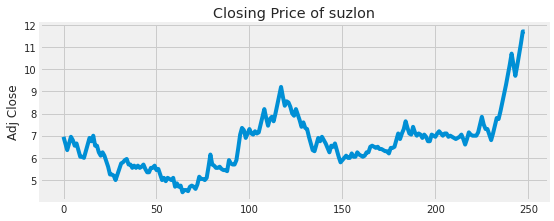

In [11]:
company_list = [df]
tech_list = ["suzlon"]
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

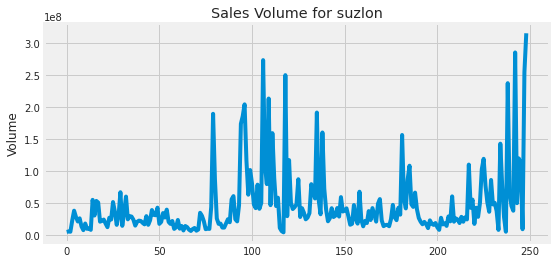

In [12]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# What was the moving average of the various stocks?

In [13]:
company_list = ['df']
company_name = ["suzlon"]

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

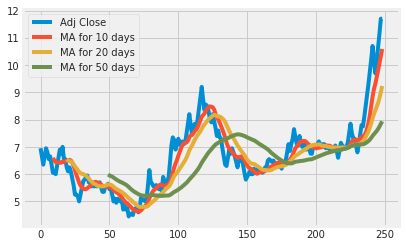

In [26]:
df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
#axes[0,0].set_title('suzlon')
fig.tight_layout()


# What was the daily return of the stock on average?

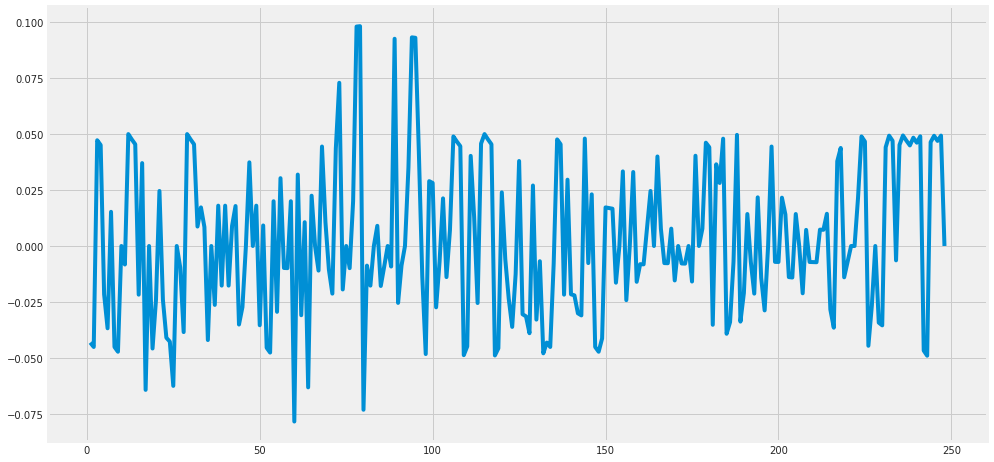

In [27]:
df['Daily Return'] = df['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)
df['Daily Return'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


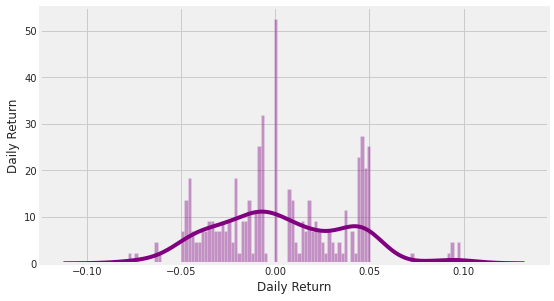

In [28]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, i)
sns.distplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.tight_layout()

# What was the correlation between different stocks closing prices

In [29]:
df = pd.read_csv('/content/SUZLON.NS.csv')


In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-12,6.95,6.95,6.95,6.95,6.95,4611813
1,2021-01-13,6.65,6.65,6.65,6.65,6.65,5276324
2,2021-01-14,6.35,6.35,6.35,6.35,6.35,4886505
3,2021-01-15,6.20,6.65,6.15,6.65,6.65,22566273
4,2021-01-18,6.85,6.95,6.70,6.95,6.95,37886970


In [31]:
closing_df = df['Adj Close']

# Let's take a quick look
closing_df.head() 

0    6.95
1    6.65
2    6.35
3    6.65
4    6.95
Name: Adj Close, dtype: float64

In [32]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

0         NaN
1   -0.043165
2   -0.045113
3    0.047244
4    0.045113
Name: Adj Close, dtype: float64

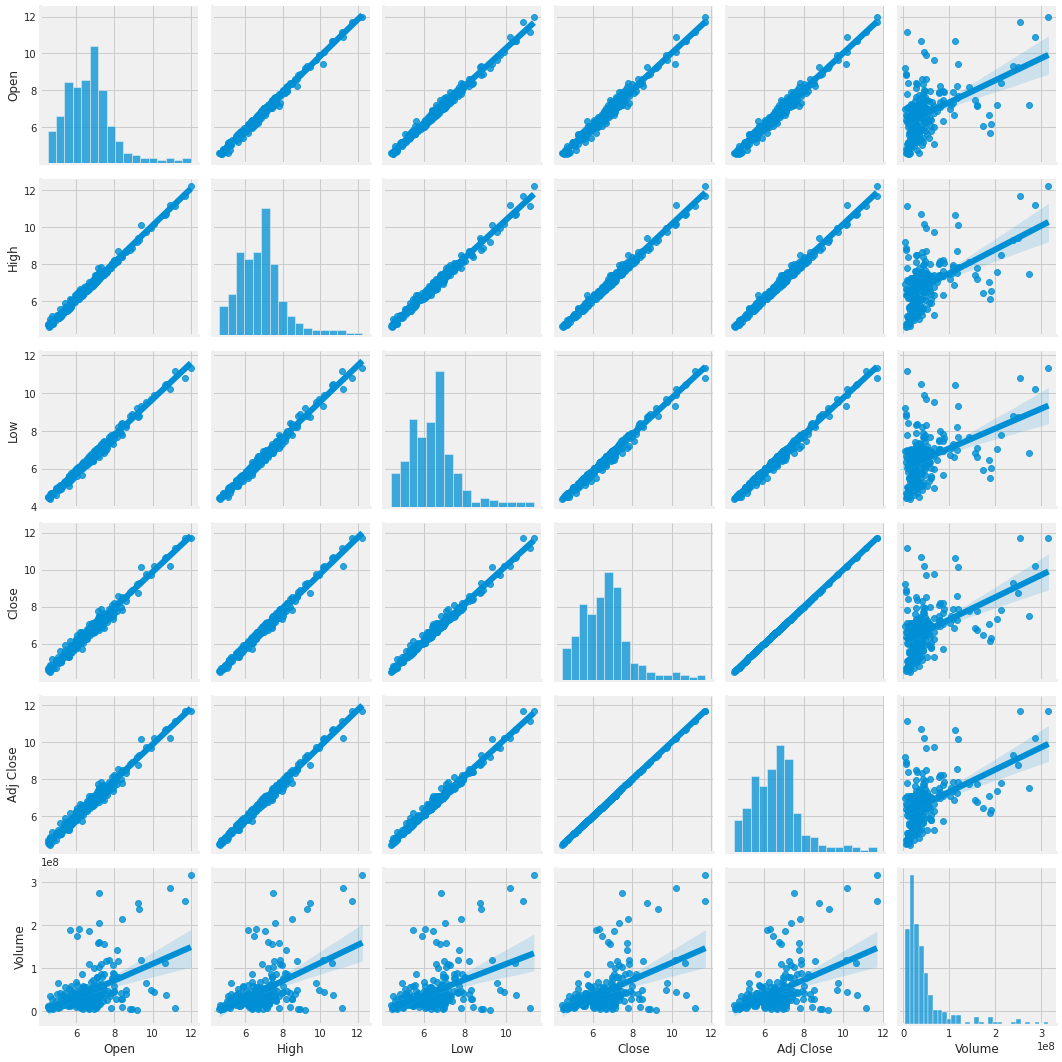

In [33]:
sns.pairplot(df, kind='reg')

In [34]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994538,0.992719,0.985692,0.985692,0.481571
High,0.994538,1.000000,0.991706,0.993306,0.993306,0.517670
Low,0.992719,0.991706,1.000000,0.992368,0.992368,0.437586
Close,0.985692,0.993306,0.992368,1.000000,1.000000,0.489040
Adj Close,0.985692,0.993306,0.992368,1.000000,1.000000,0.489040
Volume,0.481571,0.517670,0.437586,0.489040,0.489040,1.000000


LinAlgError: ignored

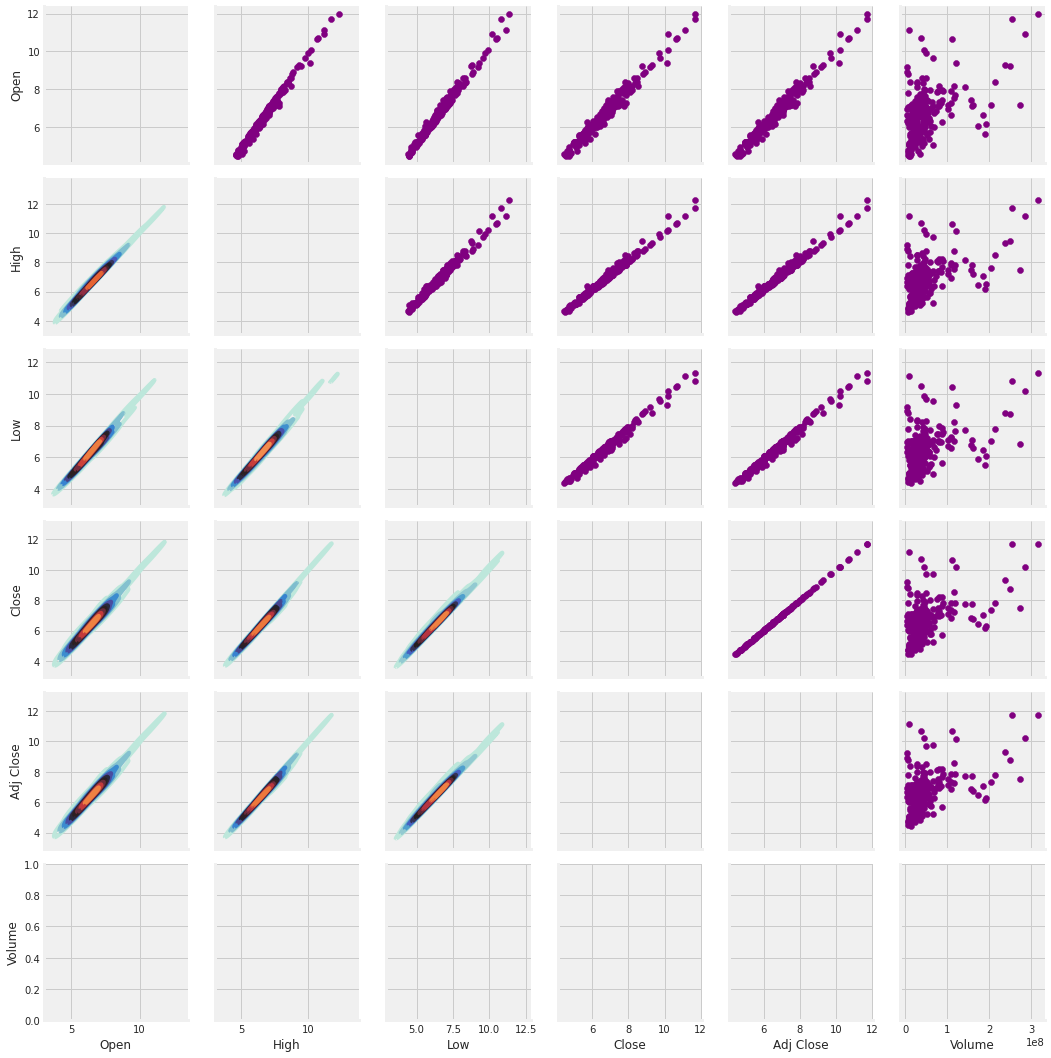

In [43]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df.dropna())
# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='icefire')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

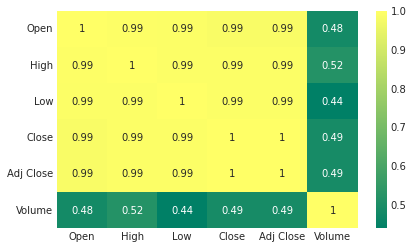

In [44]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(df.corr(), annot=True, cmap='summer')

#  How much value do we put at risk by investing in a particular stock?

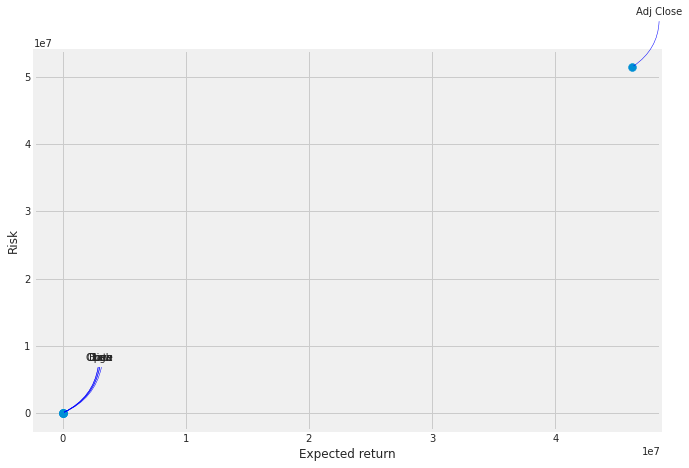

In [45]:
rets = df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting the closing price stock price of suzlon.ns:

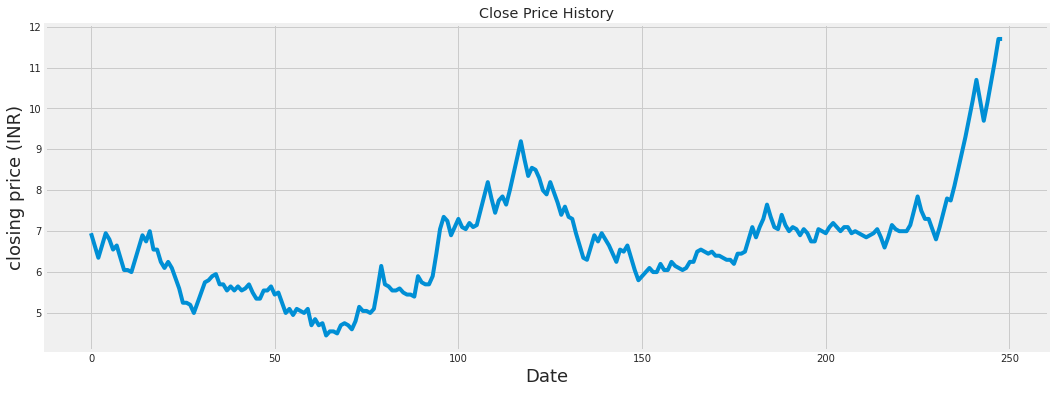

In [52]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('closing price (INR)', fontsize=18)
plt.show()

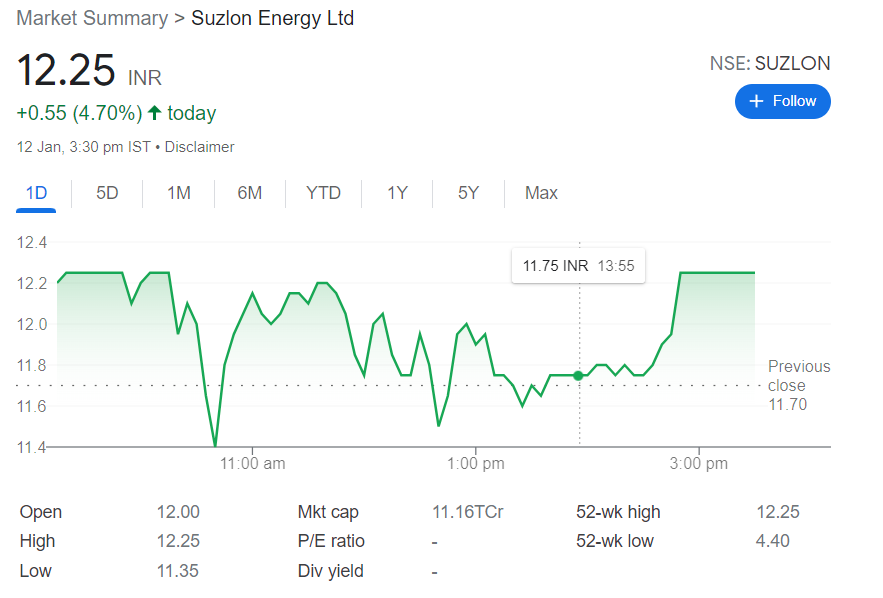

In [53]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

237

In [54]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.34482759],
       [0.30344828],
       [0.26206897],
       [0.30344828],
       [0.34482759],
       [0.32413793],
       [0.28965517],
       [0.30344828],
       [0.26206897],
       [0.22068966],
       [0.22068966],
       [0.2137931 ],
       [0.25517241],
       [0.29655172],
       [0.33793103],
       [0.31724138],
       [0.35172414],
       [0.28965517],
       [0.28965517],
       [0.24827586],
       [0.22758621],
       [0.24827586],
       [0.22758621],
       [0.19310345],
       [0.15862069],
       [0.11034483],
       [0.11034483],
       [0.10344828],
       [0.07586207],
       [0.11034483],
       [0.14482759],
       [0.17931034],
       [0.1862069 ],
       [0.2       ],
       [0.20689655],
       [0.17241379],
       [0.17241379],
       [0.15172414],
       [0.16551724],
       [0.15172414],
       [0.16551724],
       [0.15172414],
       [0.15862069],
       [0.17241379],
       [0.14482759],
       [0.12413793],
       [0.12413793],
       [0.151

In [55]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.34482759, 0.30344828, 0.26206897, 0.30344828, 0.34482759,
       0.32413793, 0.28965517, 0.30344828, 0.26206897, 0.22068966,
       0.22068966, 0.2137931 , 0.25517241, 0.29655172, 0.33793103,
       0.31724138, 0.35172414, 0.28965517, 0.28965517, 0.24827586,
       0.22758621, 0.24827586, 0.22758621, 0.19310345, 0.15862069,
       0.11034483, 0.11034483, 0.10344828, 0.07586207, 0.11034483,
       0.14482759, 0.17931034, 0.1862069 , 0.2       , 0.20689655,
       0.17241379, 0.17241379, 0.15172414, 0.16551724, 0.15172414,
       0.16551724, 0.15172414, 0.15862069, 0.17241379, 0.14482759,
       0.12413793, 0.12413793, 0.15172414, 0.15172414, 0.16551724,
       0.13793103, 0.14482759, 0.11034483, 0.07586207, 0.08965517,
       0.06896552, 0.08965517, 0.08275862, 0.07586207, 0.08965517])]
[0.034482758620689724]

[array([0.34482759, 0.30344828, 0.26206897, 0.30344828, 0.34482759,
       0.32413793, 0.28965517, 0.30344828, 0.26206897, 0.22068966,
       0.22068966, 0.2137931 , 0.2

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

177/177 [==============================] - 10s 33ms/step - loss: 0.0068


In [57]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.221313551459925

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


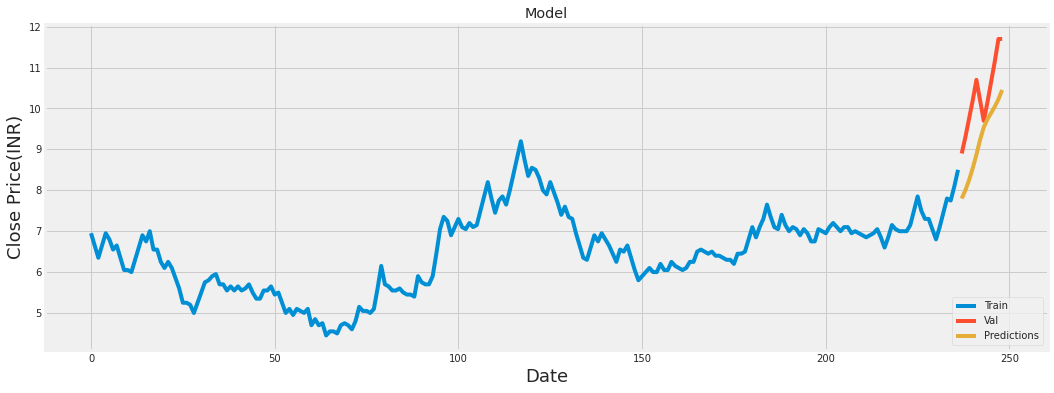

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(INR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
# Show the valid and predicted prices
valid

,Close,Predictions
237,8.90,7.797941
238,9.30,8.000442
239,9.75,8.249217
240,10.20,8.541674
241,10.70,8.871628
242,10.20,9.235728
243,9.70,9.539709
244,10.15,9.736256
245,10.65,9.890527
246,11.15,10.045362
